In [32]:
from biomarker_rank import biomarker_rank
from DataLoader import LoadData
from normalize import normalize
from heatmap import plot_heatmap

In [33]:
filename = 'Data' # 다운로드한 데이터가 들어있는 파일 
cancer_list = ['LUAD', 'LUSC'] # 입력 받는 암 데이터 명
df = LoadData(filename, cancer_list)

cancer : LUAD
file : LUAD.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt
cancer : LUSC
file : LUSC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt


In [34]:
rank, importance = biomarker_rank(df, models = [['RF', 'default'],['XGB' , {'colsample_bytree': 0.5, 'n_estimators': 200, 'subsample': 0.75}]])

In [35]:
rank

,ranking_RF,ranking_XGB
?|100130426,2132,172
?|100133144,2132,172
?|100134869,743,98
?|10357,2132,69
?|10431,696,172
...,...,...
ZYX|7791,974,172
ZZEF1|23140,2132,172
ZZZ3|26009,1419,172
psiTPTE22|387590,2132,172


In [36]:
importance

,importances_RF,importances_XGB
?|100130426,0.000000,0.000000
?|100133144,0.000000,0.000000
?|100134869,0.000144,0.000720
?|10357,0.000000,0.001565
?|10431,0.000153,0.000000
...,...,...
ZYX|7791,0.000102,0.000000
ZZEF1|23140,0.000000,0.000000
ZZZ3|26009,0.000049,0.000000
psiTPTE22|387590,0.000000,0.000000


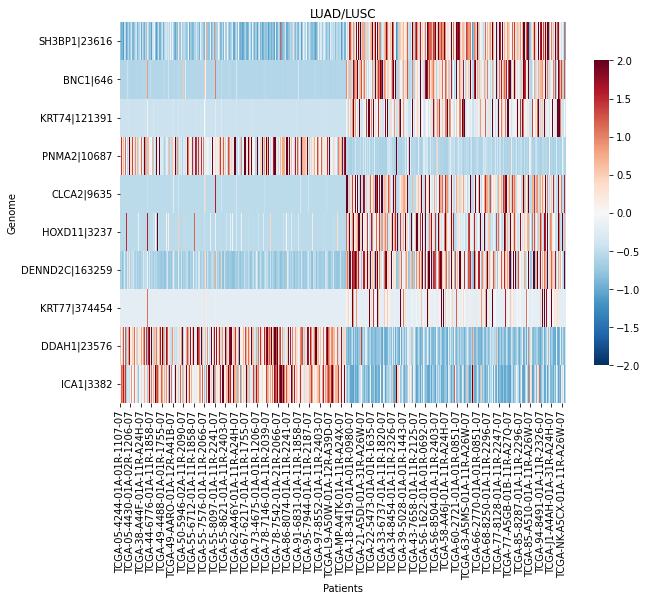

,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,TCGA-05-4397-01A-01R-1206-07,...,TCGA-NK-A5CX-01A-11R-A26W-07,TCGA-NK-A5D1-01A-11R-A26W-07,TCGA-NK-A7XE-01A-12R-A405-07,TCGA-O2-A52N-01A-11R-A26W-07,TCGA-O2-A52Q-01A-11R-A26W-07,TCGA-O2-A52S-01A-11R-A262-07,TCGA-O2-A52V-01A-31R-A262-07,TCGA-O2-A52W-01A-11R-A26W-07,TCGA-O2-A5IB-01A-11R-A27Q-07,TCGA-XC-AA0X-01A-32R-A405-07
SH3BP1|23616,-0.853666,-0.753184,-0.848269,-0.435487,-0.955749,-0.503836,-0.880176,-0.951727,-1.136895,-0.964857,...,0.315538,-0.098408,0.394737,4.619977,-0.447974,0.023787,1.127417,-0.333993,-0.984308,1.513922
BNC1|646,-0.591343,-0.593938,-0.590651,-0.592752,-0.593181,-0.593106,-0.592355,-0.589946,-0.593938,-0.590653,...,1.075257,0.628008,0.054707,0.359593,-0.592090,-0.343099,1.269403,0.455588,-0.589979,0.898486
KRT74|121391,-0.425458,-0.425458,-0.425458,-0.419601,-0.425458,-0.425458,-0.425458,-0.418889,-0.425458,-0.425458,...,0.771351,-0.411164,-0.147018,0.323405,-0.425458,8.619772,0.006442,0.758023,-0.399395,0.200469
PNMA2|10687,0.708123,-0.072465,1.415940,0.834866,1.412896,-0.455616,0.342192,-0.644342,0.637295,-0.210033,...,-0.514394,-0.107463,-0.653246,-0.485377,-0.501479,-0.646045,-0.606936,-0.602498,-0.630251,-0.536521
CLCA2|9635,-0.539068,-0.538664,-0.537669,-0.539738,-0.539068,-0.539529,-0.539853,-0.538258,-0.539609,-0.488276,...,0.795372,-0.539571,-0.442802,1.058337,-0.535303,-0.527023,1.541486,0.466896,-0.537373,0.327886
HOXD11|3237,-0.540589,-0.540589,-0.540589,-0.492811,-0.535286,-0.540589,-0.540589,-0.489324,-0.534007,-0.385287,...,0.856120,2.800836,1.681691,12.755446,-0.527645,0.124109,0.655856,0.322341,-0.538278,-0.214344
DENND2C|163259,-0.316281,-0.664781,-0.632113,-0.700375,-0.620342,-0.672365,-0.810044,-0.430208,-0.662360,-0.486627,...,0.962087,-0.435527,-0.190284,2.461705,-0.576773,-0.071939,2.411293,0.096508,-0.643022,2.872722
KRT77|374454,-0.209298,-0.209298,-0.209298,-0.209298,-0.209298,-0.209298,-0.209298,-0.209298,-0.209298,-0.208073,...,-0.203871,-0.206057,-0.163697,-0.172909,-0.209298,-0.043919,-0.192975,-0.206317,-0.209298,0.262868
DDAH1|23576,0.371950,0.586648,-0.029853,0.187891,0.071965,-0.268432,-0.503642,-0.516981,1.272895,-0.595279,...,-0.857908,-0.460871,-0.986100,-0.922525,-0.826031,-1.012680,-0.900446,-0.885174,-0.382594,-0.578721
ICA1|3382,0.132464,0.133897,-0.075621,0.218083,1.173640,0.140372,0.990054,1.717861,1.573530,-0.371530,...,-0.975978,-0.415894,-0.156357,-0.957689,-0.146365,-0.592117,-0.950748,-0.993605,-0.534857,-0.495176


In [37]:
z_score_df = normalize(df, methods = ['z_score'])
gene_list = rank.sort_values(by='ranking_RF').iloc[:10].index
z_score_df = z_score_df.loc[:,gene_list]
plot_heatmap(z_score_df)

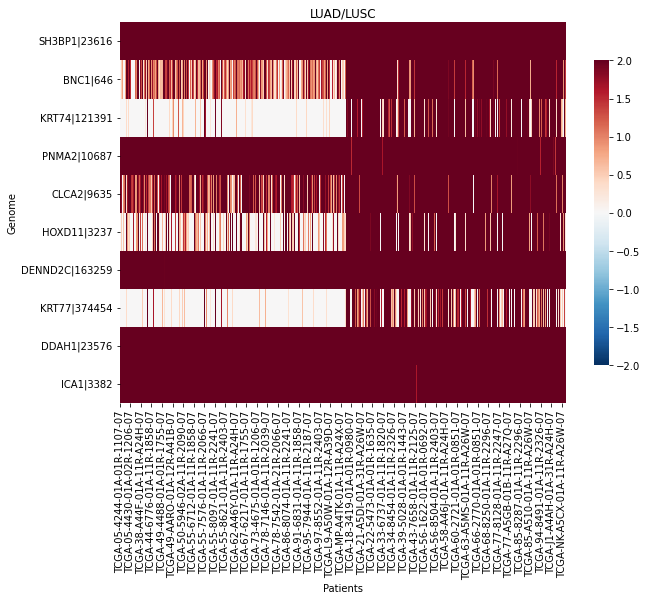

,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,TCGA-05-4397-01A-01R-1206-07,...,TCGA-NK-A5CX-01A-11R-A26W-07,TCGA-NK-A5D1-01A-11R-A26W-07,TCGA-NK-A7XE-01A-12R-A405-07,TCGA-O2-A52N-01A-11R-A26W-07,TCGA-O2-A52Q-01A-11R-A26W-07,TCGA-O2-A52S-01A-11R-A262-07,TCGA-O2-A52V-01A-31R-A262-07,TCGA-O2-A52W-01A-11R-A26W-07,TCGA-O2-A5IB-01A-11R-A27Q-07,TCGA-XC-AA0X-01A-32R-A405-07
SH3BP1|23616,5.834362,6.046150,5.846953,6.518312,5.560393,6.433878,5.770107,5.572735,4.741061,5.531869,...,7.154717,6.854290,7.203172,8.462617,6.503409,6.952729,7.566135,6.631847,5.468087,7.715048
BNC1|646,1.129594,0.000000,1.295467,0.671515,0.476793,0.513482,0.822991,1.440143,0.000000,1.294864,...,7.206276,6.894651,6.262232,6.646908,0.912724,5.315178,7.316229,6.742711,1.433870,7.094424
KRT74|121391,0.000000,0.000000,0.000000,0.214547,0.000000,0.000000,0.000000,0.237756,0.000000,0.000000,...,3.910135,0.460016,2.515921,3.453192,0.000000,5.915175,2.925787,3.899163,0.725130,3.280065
PNMA2|10687,6.741462,5.901143,7.157165,6.829743,7.155701,4.861268,6.431573,2.550335,6.688508,5.637017,...,4.531984,5.840275,1.990761,4.708053,4.614197,2.464840,3.580113,3.653620,3.068076,4.373217
CLCA2|9635,1.772747,2.128827,2.680700,0.541103,1.772747,1.103069,0.000000,2.391722,0.922790,5.775013,...,9.025813,1.012437,6.405722,9.205566,3.378672,4.393017,9.469682,8.743479,2.799839,8.594914
HOXD11|3237,0.000000,0.000000,0.000000,1.872417,0.476793,0.000000,0.000000,1.932347,0.564291,2.938670,...,5.086978,5.955656,5.549096,7.334782,0.912724,4.351217,4.933247,4.609251,0.236020,3.652817
DENND2C|163259,4.559130,3.560995,3.709926,3.368650,3.758583,3.522999,2.308836,4.327931,3.572826,4.190030,...,5.757959,4.315711,4.764753,6.356430,3.920517,4.925657,6.341175,5.117556,3.662620,6.472819
KRT77|374454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199588,...,0.682137,0.460016,2.221093,2.022527,0.000000,3.427557,1.371561,0.430028,0.000000,4.455326
DDAH1|23576,7.610865,7.750455,7.281872,7.473412,7.376015,7.018798,6.666864,6.642653,8.098599,6.487334,...,5.658121,6.740768,4.662783,5.275742,5.803741,4.226350,5.423425,5.514150,6.863320,6.522251
ICA1|3382,6.496004,6.497175,6.309528,6.563660,7.111848,6.502448,7.027295,7.327238,7.274481,5.964901,...,4.129264,5.901228,6.226649,4.277198,6.237287,5.598569,4.328069,3.962435,5.707287,5.776243


In [38]:
log1p_df = normalize(df, methods = ['log1p'])
gene_list = rank.sort_values(by='ranking_RF').iloc[:10].index
log1p_df = log1p_df.loc[:,gene_list]
plot_heatmap(log1p_df)

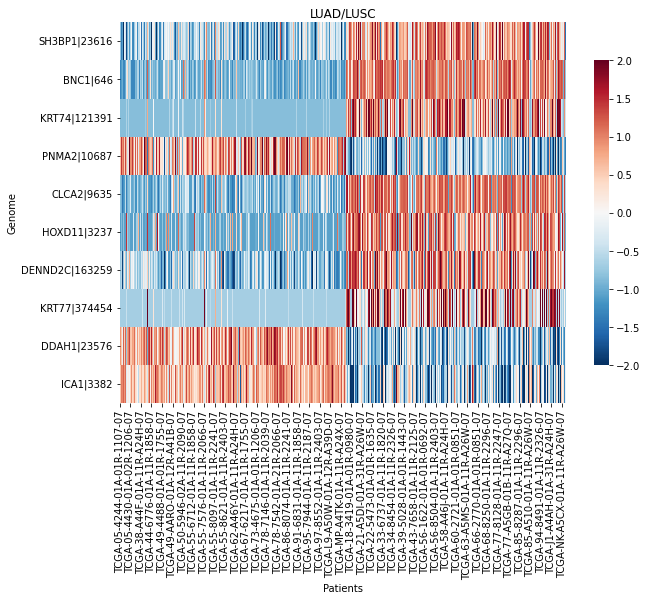

,TCGA-05-4244-01A-01R-1107-07,TCGA-05-4249-01A-01R-1107-07,TCGA-05-4250-01A-01R-1107-07,TCGA-05-4382-01A-01R-1206-07,TCGA-05-4384-01A-01R-1755-07,TCGA-05-4389-01A-01R-1206-07,TCGA-05-4390-01A-02R-1755-07,TCGA-05-4395-01A-01R-1206-07,TCGA-05-4396-01A-21R-1858-07,TCGA-05-4397-01A-01R-1206-07,...,TCGA-NK-A5CX-01A-11R-A26W-07,TCGA-NK-A5D1-01A-11R-A26W-07,TCGA-NK-A7XE-01A-12R-A405-07,TCGA-O2-A52N-01A-11R-A26W-07,TCGA-O2-A52Q-01A-11R-A26W-07,TCGA-O2-A52S-01A-11R-A262-07,TCGA-O2-A52V-01A-31R-A262-07,TCGA-O2-A52W-01A-11R-A26W-07,TCGA-O2-A5IB-01A-11R-A27Q-07,TCGA-XC-AA0X-01A-32R-A405-07
SH3BP1|23616,-1.024472,-0.755976,-1.008510,-0.157387,-1.371800,-0.264428,-1.105932,-1.356152,-2.410517,-1.407961,...,0.649423,0.268554,0.710853,2.307528,-0.176280,0.393350,1.171004,-0.013451,-1.488821,1.359789
BNC1|646,-0.888558,-1.287753,-0.829939,-1.050442,-1.119256,-1.106290,-0.996911,-0.778811,-1.287753,-0.830152,...,1.258921,1.148794,0.925299,1.061243,-0.965199,0.590613,1.297778,1.095099,-0.781028,1.219393
KRT74|121391,-0.850557,-0.850557,-0.850557,-0.721807,-0.850557,-0.850557,-0.850557,-0.707879,-0.850557,-0.850557,...,1.495917,-0.574501,0.659248,1.221705,-0.850557,2.699142,0.905209,1.489332,-0.415406,1.117811
PNMA2|10687,1.143236,0.567065,1.428265,1.203766,1.427261,-0.145932,0.930758,-1.730439,1.106927,0.385966,...,-0.371708,0.525330,-2.114115,-0.250986,-0.315338,-1.789059,-1.024365,-0.973964,-1.375446,-0.480568
CLCA2|9635,-0.923524,-0.817761,-0.653842,-1.289350,-0.923524,-1.122434,-1.450070,-0.739675,-1.175981,0.265238,...,1.230798,-1.149353,0.452573,1.284189,-0.446529,-0.145246,1.362637,1.146939,-0.618455,1.102812
HOXD11|3237,-1.090066,-1.090066,-1.090066,-0.220685,-0.868687,-1.090066,-1.090066,-0.192859,-0.828061,0.274385,...,1.271865,1.675200,1.486430,2.315541,-0.666280,0.930244,1.200486,1.050052,-0.980480,0.605971
DENND2C|163259,0.136801,-0.742155,-0.611006,-0.911534,-0.568160,-0.775614,-1.844804,-0.066793,-0.731737,-0.188228,...,1.192486,-0.077554,0.317871,1.719499,-0.425561,0.459563,1.706065,0.628549,-0.652664,1.821990
KRT77|374454,-0.672494,-0.672494,-0.672494,-0.672494,-0.672494,-0.672494,-0.672494,-0.672494,-0.672494,-0.559521,...,-0.286385,-0.412112,0.584708,0.472314,-0.672494,1.267601,0.103849,-0.429086,-0.672494,1.849348
DDAH1|23576,0.732510,0.862214,0.426819,0.604793,0.514295,0.182379,-0.144628,-0.167125,1.185699,-0.311442,...,-1.081924,-0.075959,-2.006764,-1.437220,-0.946618,-2.412285,-1.299997,-1.215698,0.037913,-0.278999
ICA1|3382,0.528526,0.529509,0.371967,0.585328,1.045567,0.533936,0.974579,1.226401,1.182107,0.082631,...,-1.458505,0.029173,0.302385,-1.334305,0.311316,-0.224929,-1.291595,-1.598569,-0.133653,-0.075760


In [39]:
log1p_z_score_mix_df = normalize(df, methods = ['log1p','z_score'])
gene_list = rank.sort_values(by='ranking_RF').iloc[:10].index
log1p_z_score_mix_df = log1p_z_score_mix_df.loc[:,gene_list]
plot_heatmap(log1p_z_score_mix_df)